# Creating statistics and maps of street designations for communes

## Load libraries and data

In [14]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import time
import pysal as ps
from legendgram import legendgram
import esda

%matplotlib inline

In [15]:
%%time 

# Street name designations
streetnames = pd.read_csv('../Datapreparation/streetnames.csv', encoding='UTF-8-SIG', sep=';')

# Specific street name designations
streetnames_s = pd.read_csv('../Modeling/out_mapping.csv', encoding='UTF-8-SIG', sep=';', low_memory=False)

# Communes data
com = pd.read_csv('data/gmde_info.csv', encoding='UTF-8-SIG', sep=';')

# Communes geometries
com_geom = geopandas.read_file('data/gemeinden.geojson')

CPU times: total: 2.47 s
Wall time: 2.9 s


## Mapping most common generic street term per commune

In [20]:
# Create dataset with all information on commune level
communes = pd.merge(com_geom, com, on=['GMDNR'], how='outer')

In [21]:
#get most common generic street designation per commune
commune_top_term = streetnames_s.groupby(['COM_FOSNR'])['STR_TERMS'].agg(pd.Series.mode).to_frame()

In [22]:
commune_top_term.STR_TERMS.apply(lambda x: str(x)).unique()

array(['weg', 'strasse', 'wäg', "['strasse' 'weg']", '[]', 'chemin',
       'rue', 'route', "['chemin' 'rue']", "['gasse' 'weg']",
       "['impasse' 'route']", 'impasse', "['chemin' 'route']", 'gasse',
       'platz', 'voa', 'voia', 'veia', 'via', 'vietta', 'strada',
       'ruelle', "['chemin' 'route' 'rue']", "['route' 'rue']",
       "['chemin' 'gasse' 'route' 'rue' 'ruelle']"], dtype=object)

In [23]:
#There are multiple mode for some communes, we only keep the first one.
commune_top_term['STR_TERMS'] = commune_top_term['STR_TERMS'].str.replace("(' ').*","", regex=True)

In [24]:
commune_top_term.STR_TERMS.apply(lambda x: str(x)).unique()

array(['weg', 'strasse', 'wäg', 'nan', 'chemin', 'rue', 'route',
       'impasse', 'gasse', 'platz', 'voa', 'voia', 'veia', 'via',
       'vietta', 'strada', 'ruelle'], dtype=object)

In [59]:
streetnames_s['classif'] = streetnames_s['classif'].replace('Andere', np.NaN)

In [60]:
commune_top_term_s = streetnames_s.groupby(['COM_FOSNR'])['classif'].agg(pd.Series.mode).to_frame()

In [61]:
commune_top_term_s.classif.apply(lambda x: str(x)).unique()

array(['Natur', "['Natur' 'Siedlung']", 'Siedlung',
       "['Lebewesen' 'Natur']", 'Lebewesen', 'Ortschaft', '[]',
       "['Gewässer' 'Ortschaft' 'Religion' 'Siedlung']", 'Person',
       "['Lebewesen' 'Siedlung']", "['Natur' 'Ortschaft']",
       "['Berg' 'Natur']", "['Natur' 'Ortschaft' 'Siedlung']",
       "['Ortschaft' 'Siedlung']", "['Lebewesen' 'Person' 'Religion']",
       "['Ortschaft' 'Person']", "['Lebewesen' 'Natur' 'Ortschaft']",
       "['Gewässer' 'Siedlung']", "['Natur' 'Person']",
       "['Ortschaft' 'Person' 'Siedlung']", 'Gewässer', 'Berg',
       "['Lebewesen' 'Ortschaft' 'Siedlung']", "['Berg' 'Lebewesen']",
       "['Berg' 'Gewässer' 'Natur' 'Siedlung']", 'Religion',
       "['Natur' 'Religion' 'Siedlung']", "['Ortschaft' 'Religion']",
       "['Person' 'Siedlung']", "['Natur' 'Person' 'Siedlung']",
       "['Ortschaft' 'Person' 'Religion']",
       "['Ortschaft' 'Religion' 'Siedlung']",
       "['Gewässer' 'Ortschaft' 'Siedlung']", "['Berg' 'Ortschaft']",
     

In [62]:
#There are multiple mode for some communes, we only keep the first one.
commune_top_term_s['classif'] = commune_top_term_s['classif'].str.replace("(' ').*","", regex=True)

In [63]:
commune_top_term_s.classif.apply(lambda x: str(x)).unique()

array(['Natur', 'nan', 'Siedlung', 'Lebewesen', 'Ortschaft', 'Person',
       'Gewässer', 'Berg', 'Religion'], dtype=object)

In [64]:
communes = pd.merge(communes, commune_top_term, left_on='GMDNR', right_on='COM_FOSNR', how='outer')

In [65]:
communes = pd.merge(communes, commune_top_term_s, left_on='GMDNR', right_on='COM_FOSNR', how='outer')

In [66]:
communes.columns

Index(['FID', 'GMDHISTID_x', 'GMDNR', 'GMDNAME_x', 'BZHISTID_x', 'BZNR_x',
       'KTNR_x', 'GRNR_x', 'AREA_HA_x', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX',
       'E_CNTR_x', 'N_CNTR_x', 'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'Z_CNTR_x',
       'geometry', 'GMDHISTID_y', 'GMDNAME_y', 'BZHISTID_y', 'BZNR_y',
       'KTNR_y', 'GRNR_y', 'AREA_HA_y', 'E_CNTR_y', 'N_CNTR_y', 'Z_CNTR_y',
       'GMD_STR_LENGTH', 'STR_TERMS_x', 'classif_x', 'STR_TERMS_y',
       'classif_y', 'STR_TERMS', 'classif'],
      dtype='object')

<AxesSubplot: >

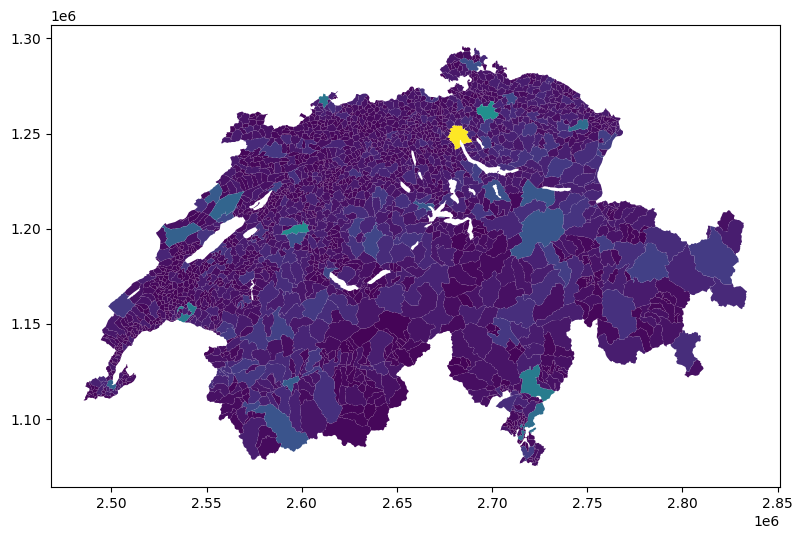

In [10]:
communes.plot(column='GMD_STR_LENGTH', figsize=(10, 6))
#plt.axis('off')

In [11]:
communes['STR_TERMS'] = communes['STR_TERMS'].fillna('other')

In [12]:
communes['STR_TERMS'].apply(lambda x: str(x)).unique()

array(['strasse', 'via', 'weg', 'wäg', 'other', 'chemin', 'rue', 'route',
       'impasse', 'gasse', 'platz', 'voa', 'voia', 'veia', 'vietta',
       'strada', 'ruelle'], dtype=object)

In [13]:
colors = {
    'chemin': '#cab2d6',
    'gasse': '#1f78b4',
    'impasse': '#e31a1c',
    'platz': '#35978f',
    'route': '#fb9a99',
    'rue': '#b2df8a',
    'ruelle': '#33a02c',
    'strada': '#ffff33',
    'strasse': '#a6cee3',
    'veia': '#f1b6da',
    'via': '#fee08b',
    'vietta': '#762a83',
    'voa': '#c51b7d',
    'voia': '#8c510a',
    'wäg': '#ff7f00',
    'weg': '#fdbf6f',
    'other': '#d9d9d9',
}

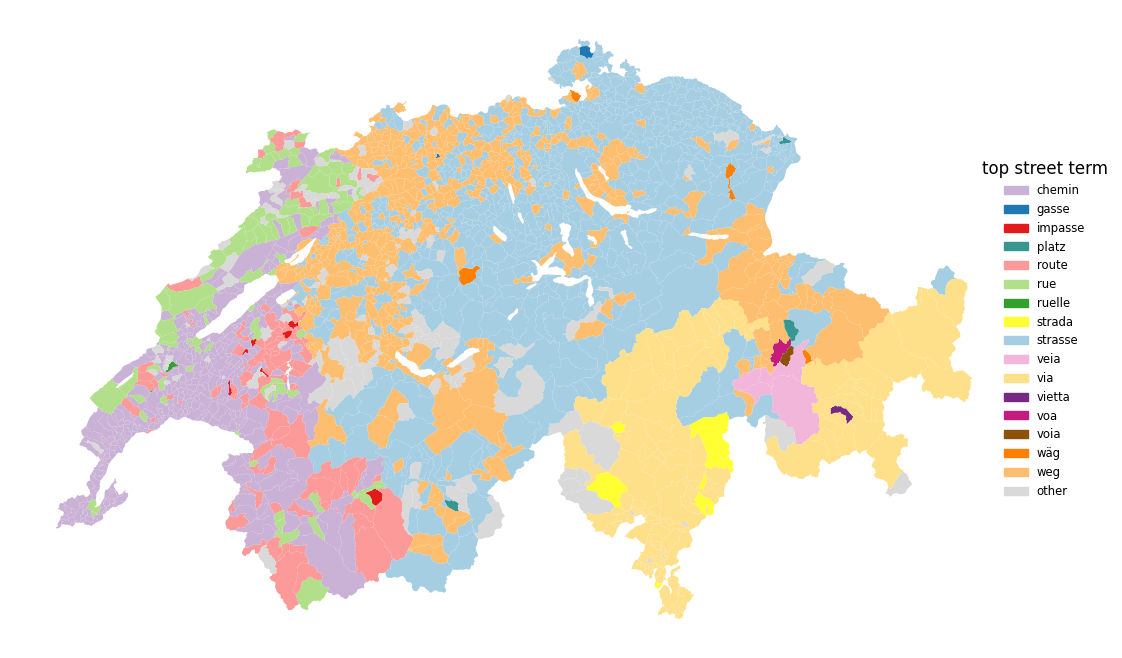

In [29]:
f, ax = plt.subplots(1, figsize=(13,13))
    
    
communes.plot(ax=ax, 
                        color=[colors[d] for d in communes.STR_TERMS])


plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors[k],
                label=k) for k in colors],
               loc='center right',
               fontsize='small',
               edgecolor='none',
               title='top street term',
               title_fontsize='large',
               bbox_to_anchor=(1.1, 0.5))

## Mapping ratio of named streets (vs streets without name)

In [16]:
# Street name geometries
streets_geom = geopandas.read_file('data/pure_line.geojson')

In [17]:
# Create dataset with all information on street level
streetnames_geom = pd.merge(streets_geom, streetnames, on=['STR_ESID','STR_ESID'], how='outer')

In [18]:
streetnames_length_comm = streetnames_geom.dissolve(by='COM_FOSNR', aggfunc={
         "LENGTH": "sum",
         "COM_NAME": "first",
         "COM_FOSNR": "first"    
     })

In [19]:
streetnames_length_comm.columns

Index(['geometry', 'LENGTH', 'COM_NAME', 'COM_FOSNR'], dtype='object')

In [20]:
# to remove ambiguity error
streetnames_length_comm.rename(columns = {'COM_FOSNR':'FOSNR'}, inplace = True)

In [21]:
#now we have per commune street length AND streetname length
communes_length = pd.merge(communes, streetnames_length_comm, left_on='GMDNR', right_on='COM_FOSNR', how='outer')

In [22]:
communes_length.LENGTH = communes_length.LENGTH/1000

In [23]:
communes_length = communes_length.assign(ratioNamed = communes_length.LENGTH/communes_length.GMD_STR_LENGTH)

In [24]:
# to remove ambiguity error
communes_length.rename(columns = {'geometry_x':'geometry'}, inplace = True)

In [25]:
communes_length['ratioNamed'] = communes_length['ratioNamed'].fillna('0')

In [26]:
communes_length['ratioNamed'] = communes_length['ratioNamed'].astype(str).astype(float)

(2468003.35, 2851257.65, 1064234.8020000015, 1306970.712999999)

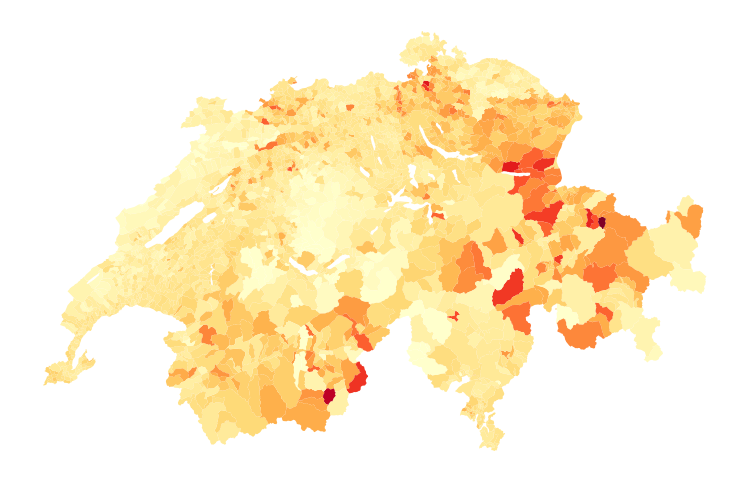

In [27]:
communes_length.plot(column='ratioNamed', cmap='YlOrRd', figsize=(10, 6))
plt.axis('off')

(2468003.35, 2851257.65, 1064234.8020000015, 1306970.712999999)

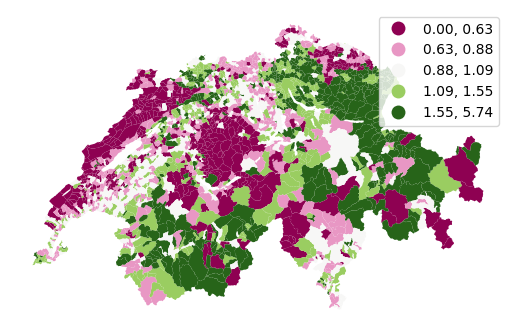

In [28]:
fig, ax = plt.subplots(1, 1)
communes_length.plot(column='ratioNamed', 
                     cmap='PiYG', 
                     figsize=(113,13), 
                     ax=ax, 
                     legend=True,
                     scheme='quantiles')
plt.axis('off')

# Mapping most common specific street term per commune

In [67]:
communes['classif'] = communes['classif'].fillna('no_value')

In [68]:
communes['classif'].apply(lambda x: str(x)).unique()

array(['Natur', 'Person', 'no_value', 'Siedlung', 'Lebewesen',
       'Ortschaft', 'Gewässer', 'Berg', 'Religion'], dtype=object)

In [82]:
colors = {
    'Ortschaft': '#e31a1c',
    'Natur': '#b2df8a',
    'Gewässer': '#1f78b4',
    'Lebewesen': '#33a02c',
    'Siedlung': '#cab2d6',
    'Person': '#fdbf6f',
    'Berg': '#8c510a',
    'Religion': '#ffff33',
    'no_value': '#d9d9d9',
}

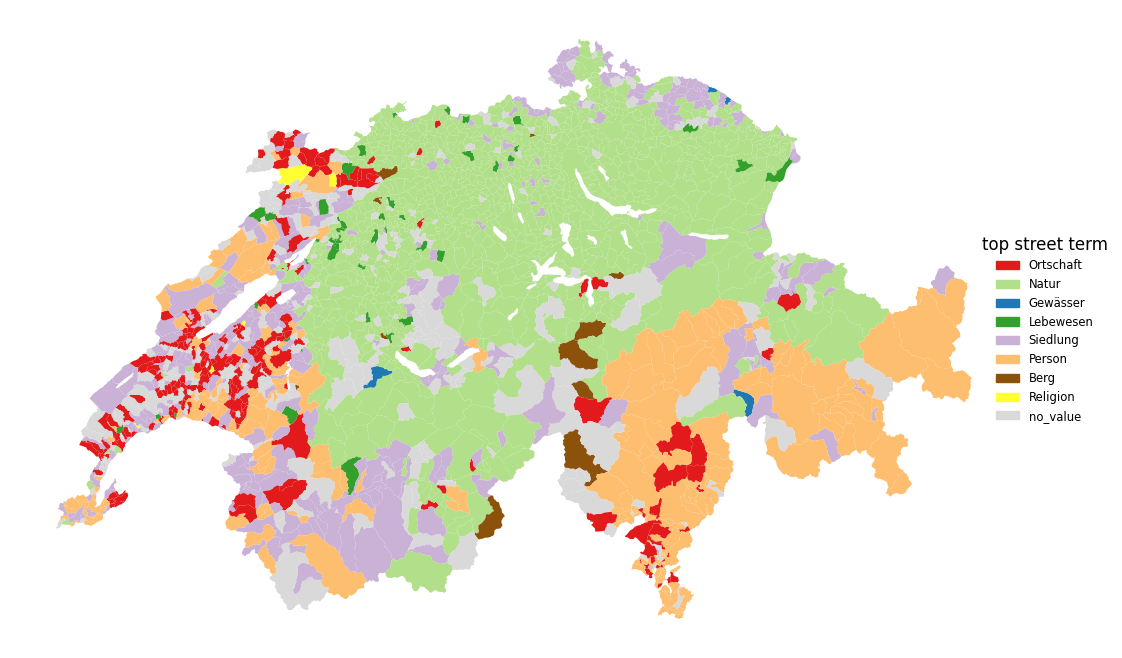

In [83]:
f, ax = plt.subplots(1, figsize=(13,13))
    
    
communes.plot(ax=ax, 
                        color=[colors[d] for d in communes.classif])


plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors[k],
                label=k) for k in colors],
               loc='center right',
               fontsize='small',
               edgecolor='none',
               title='top street term',
               title_fontsize='large',
               bbox_to_anchor=(1.1, 0.5))

## Mapping percent of common specific street term per commune

In [130]:
streetnames_s.groupby(['COM_FOSNR', 'classif']).size().to_frame()

0
COM_FOSNR classif       
1.0       Berg         7
          Gewässer     3
          Natur       15
          Ortschaft    3
          Person       2
          Religion     2
          Siedlung     9
2.0       Berg        14
          Gewässer    12
          Lebewesen    7
          Natur       65
          Ortschaft    9
          Person       5
          Religion     1
          Siedlung    23
3.0       Berg         8
          Beruf        2
          Gewässer     9
          Lebewesen    8
          Natur       40
          Person       3
          Religion     1
          Siedlung     8
4.0       Berg        13
          Beruf        1
          Gewässer    15
          Lebewesen    5
          Natur       55
          Ortschaft    3
          Person       8
          Siedlung    13
5.0       Berg         5
          Gewässer     6
          Lebewesen    7
          Natur       66
          Ortschaft    6
          Person       3
          Siedlung     8
6.0       Berg         3
          Lebewesen    1
          Natur       30
          Ortschaft    9
          Siedlung     7
7.0       Berg         5
          Beruf        1
          Gewässer     1
          Lebewesen    1
          Natur       18
          Ortschaft    5
          Person       1
          Religion     1
          Siedlung    10
8.0       Berg         2
          Gewässer     1
          Natur       12
          Ortschaft    2
          Person       1
          Religion     1
          Siedlung     6
9.0       Berg         5
          Gewässer     4
          Lebewesen    3
          Natur       31
          Ortschaft   10
          Religion     1
          Siedlung     9
10.0      Berg         3
          Beruf        1
          Gewässer     5
          Lebewesen    3
          Natur       24
          Ortschaft    4
          Person       4
          Siedlung    11
11.0      Berg         6
          Gewässer     3
          Lebewesen    2
          Natur       21
          Ortschaft    4
          Person       1
          Religion     1
          Siedlung     6
12.0      Berg         2
          Beruf        1
          Gewässer     1
          Natur       23
          Ortschaft    1
          Person       2
          Religion     1
          Siedlung     7
13.0      Berg         3
          Beruf        1
          Lebewesen    1
          Natur       24
          Ortschaft    2
          Siedlung     4
14.0      Berg         3
          Beruf        1
          Gewässer     1
          Lebewesen    2
          Natur       32
          Ortschaft    4
          Person       2
          Religion     1
          Siedlung     5
21.0      Berg         3
          Gewässer     4
          Lebewesen    1
          Natur       11
          Ortschaft    1
          Person       1
          Siedlung    10
22.0      Berg         3
          Gewässer     2
          Natur       10
          Ortschaft    5
          Person       3
          Siedlung     5
23.0      Berg         6
          Beruf        1
          Gewässer     3
          Lebewesen    2
          Natur       22
          Ortschaft    5
          Siedlung     7
24.0      Berg         3
          Beruf        1
          Gewässer     7
          Natur       30
          Ortschaft    3
          Person       1
          Religion     2
          Siedlung     9
25.0      Berg         5
          Gewässer     5
          Lebewesen    2
          Natur        7
          Ortschaft    2
          Person       2
          Siedlung     6
26.0      Berg         2
          Gewässer     2
          Lebewesen    1
          Natur       10
          Ortschaft    1
          Person       1
          Religion     1
          Siedlung     6
27.0      Berg         3
          Beruf        2
          Gewässer     5
          Lebewesen    9
          Natur       19
          Ortschaft    4
          Person       3
          Religion     4
          Siedlung    10
28.0      Berg         2
          Beruf        

In [171]:
subset = streetnames_s['classif'].str.contains('Person').groupby(streetnames_s['COM_FOSNR']).sum().to_frame()
subset["classif"] = subset["classif"].astype(int)

In [172]:
alle = streetnames_s.groupby(['COM_FOSNR'])['classif'].agg(pd.Series.count).to_frame()

In [173]:
subset_merge = pd.merge(subset, alle, on='COM_FOSNR', how='outer')

In [174]:
subset_merge = subset_merge.assign(percent_subset = subset_merge.classif_x/subset_merge.classif_y*100)
subset_merge

classif_x  classif_y  percent_subset
COM_FOSNR                                      
1.0                2         41        4.878049
2.0                5        136        3.676471
3.0                3         79        3.797468
4.0                8        113        7.079646
5.0                3        101        2.970297
6.0                0         50        0.000000
7.0                1         43        2.325581
8.0                1         25        4.000000
9.0                0         63        0.000000
10.0               4         55        7.272727
11.0               1         44        2.272727
12.0               2         38        5.263158
13.0               0         35        0.000000
14.0               2         51        3.921569
21.0               1         31        3.225806
22.0               3         28       10.714286
23.0               0         46        0.000000
24.0               1         56        1.785714
25.0               2         29        6.896552
26.0               1         24        4.166667
27.0               3         59        5.084746
28.0               0         32        0.000000
29.0               2         32        6.250000
30.0              10         64       15.625000
31.0               3         32        9.375000
32.0               1         32        3.125000
33.0               3         84        3.571429
34.0               2         53        3.773585
35.0               9         80       11.250000
37.0               3         48        6.250000
38.0               7         60       11.666667
39.0               1         41        2.439024
40.0               2         31        6.451613
41.0               2         23        8.695652
43.0               0         15        0.000000
51.0               1         49        2.040816
52.0               6        140        4.285714
53.0              15        162        9.259259
54.0               1         82        1.219512
55.0               5         99        5.050505
56.0               8        137        5.839416
57.0               3         93        3.225806
58.0              14        156        8.974359
59.0               3         56        5.357143
60.0               0         40        0.000000
61.0               6         73        8.219178
62.0               9        176        5.113636
63.0               1         31        3.225806
64.0               3         68        4.411765
65.0               3         85        3.529412
66.0              11         95       11.578947
67.0               2         48        4.166667
68.0               3         53        5.660377
69.0               8        115        6.956522
70.0               3         25       12.000000
71.0               4         62        6.451613
72.0               3         61        4.918033
81.0               2         22        9.090909
82.0               0         41        0.000000
83.0               3         88        3.409091
84.0               0         42        0.000000
85.0               2         35        5.714286
86.0               6         73        8.219178
87.0               4         37       10.810811
88.0               3         41        7.317073
89.0               2         43        4.651163
90.0               3        162        1.851852
91.0               2         44        4.545455
92.0               6         57       10.526316
93.0               6         46       13.043478
94.0               1         63        1.587302
95.0               2         22        9.090909
96.0              11        147        7.482993
97.0              11        104       10.576923
98.0               3         28       10.714286
99.0               6         44       13.636364
100.0              2         47        4.255319
101.0              6         60       10.000000
102.0              4         46        8.695652
111.0              5         66        7.575758
112.0              2         89        2.247191
113.0              6       

In [175]:
communes = pd.merge(communes, subset_merge, left_on='GMDNR', right_on='COM_FOSNR', how='outer')

C:\Users\micha\AppData\Local\Temp\ipykernel_18528\2343812105.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'classif_y_x', 'classif_x_x'} in the result is deprecated and will raise a MergeError in a future version.
  communes = pd.merge(communes, subset_merge, left_on='GMDNR', right_on='COM_FOSNR', how='outer')


In [178]:
import mapclassify as mc
bins = mc.Quantiles(communes['percent_subset'].values, k=9).bins
bins

array([ 0.        ,  1.8036218 ,  3.84615385,  5.66037736,  8.21418769,
       12.5       , 21.73913043, 37.5       ,         nan])

IndexError: tuple index out of range

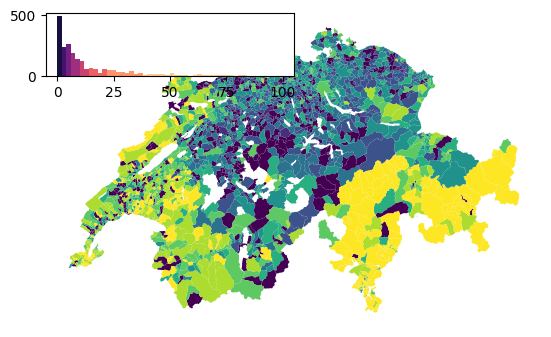

In [191]:
f,ax = plt.subplots()
communes.plot('percent_subset', k=9, ax=ax, scheme='Quantiles')

import mapclassify as mc
bins = mc.Quantiles(communes['percent_subset'].values, k=9).bins
ax.axis('off')
import palettable.matplotlib as palmpl

legendgram(f,ax,communes['percent_subset'],bins,pal=palmpl.Magma_9,
           legend_size=(.5,.2), # legend size in fractions of the axis
           loc='upper left', # matplotlib-style legend locations
           clip = (2,10) # clip the displayed range of the histogram
           )

https://github.com/pysal/legendgram

z.B. percent classif = Lebewesen

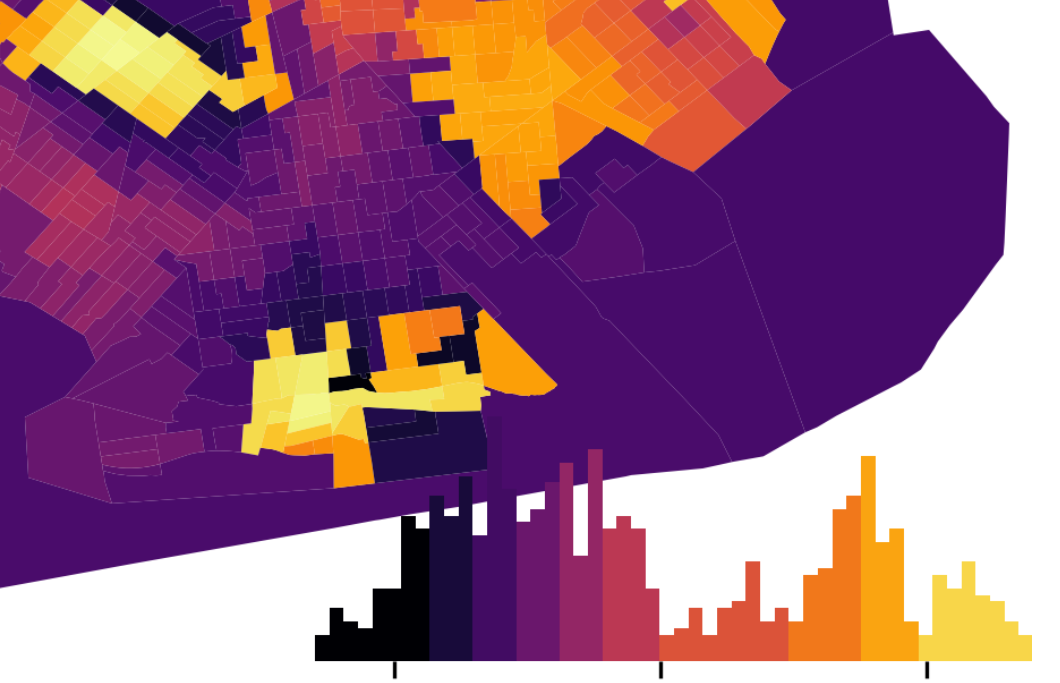

In [ ]:

>>> data = gpd.read_file(ps.examples.get_path('south.shp'))
>>> data.crs = {'init': 'epgs:4269'}
>>> data.to_crs(epsg=5070)
>>> f,ax = plt.subplots()
>>> data.plot('DV80', k=10, ax=ax, scheme='Quantiles')
>>> bins = ps.Quantiles(data['DV80'].values, k=10).bins
>>> from legendgram import legendgram
>>> import palettable.matplotlib as palmpl
>>> legendgram(f,ax,data['DV80'],bins,pal=palmpl.Viridis_10,
               legend_size=(.5,.2), # legend size in fractions of the axis
               loc = 'upper left' # matplotlib-style legend locations
               clip = (2,10) # clip the displayed range of the histogram
               )

IndexError: tuple index out of range

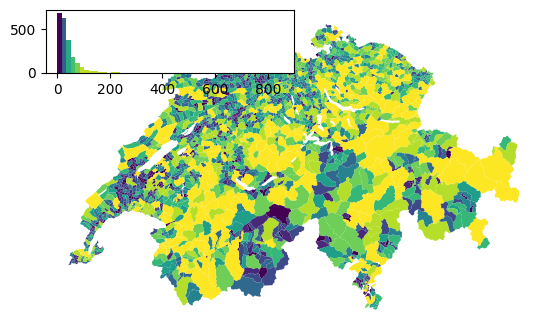

In [164]:
f,ax = plt.subplots()
communes.plot('GMD_STR_LENGTH', k=10, ax=ax, scheme='Quantiles')

import mapclassify as mc
bins = mc.Quantiles(communes['GMD_STR_LENGTH'].values, k=10).bins
ax.axis('off')
import palettable.matplotlib as palmpl
legendgram(f,ax,communes['GMD_STR_LENGTH'],bins,pal=palmpl.Viridis_10,
           legend_size=(.5,.2), # legend size in fractions of the axis
           loc='upper left', # matplotlib-style legend locations
           clip = (2,10) # clip the displayed range of the histogram
           )

IndexError: tuple index out of range

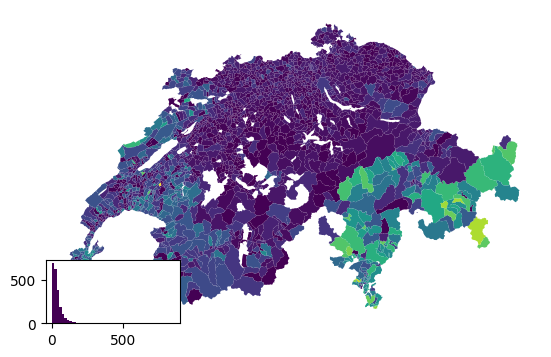

In [192]:
import palettable.matplotlib as mplpal

ax = communes.plot("percent_subset")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           communes.GMD_STR_LENGTH, # the attribute to map
           np.percentile(communes.GMD_STR_LENGTH, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10 # the palette to use
          )

https://nbviewer.org/github/pysal/splot/blob/main/notebooks/esda_morans_viz.ipynb

Strasse autokorreliert

Lebewesen nicht ?

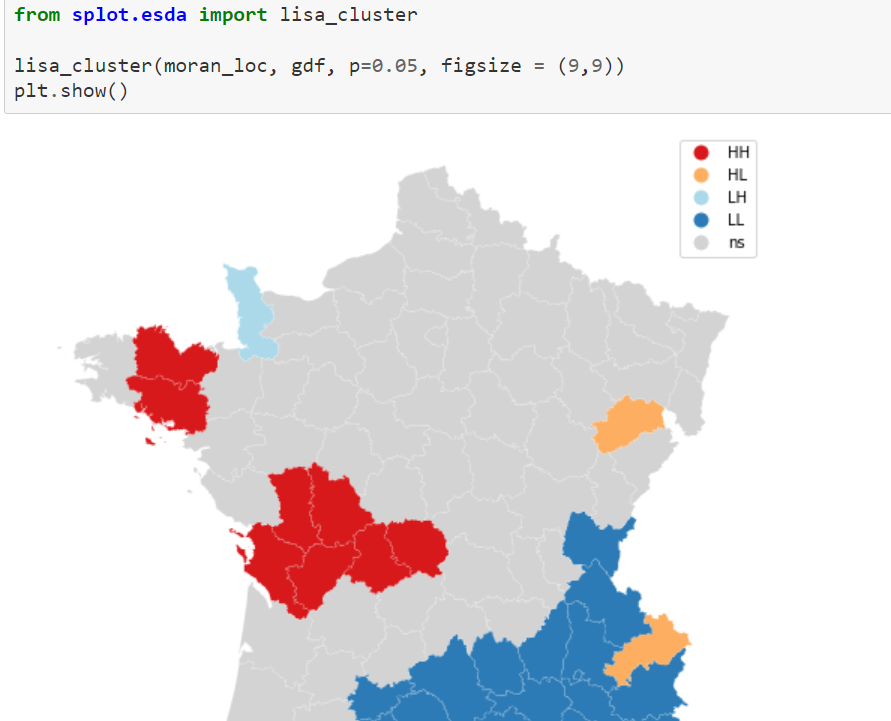

https://pysal.org/scipy2019-intermediate-gds/stochastic/gds5-exploration.html

https://pysal.org/scipy2019-intermediate-gds/stochastic/gds6-spatial-clusters.html